In [15]:
import tensorflow as tf

# 從 TensorFlow 資料集中匯入 MNIST
mnist = tf.keras.datasets.mnist

# 下載並拆分訓練和測試資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 正規化影像資料（將像素值縮放到 0 到 1 之間）
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# import torch
# from torchvision import datasets, transforms

# # 下載並定義 MNIST 的資料轉換（將影像轉為Tensor並正規化）
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# # 下載訓練資料和測試資料
# train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# # 定義 DataLoader 用於批量讀取資料
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [19]:
X_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0
X_train.shape

(60000, 784)

In [20]:
# Define a simple Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(28*28,), activation='relu'),  # 第一個隱藏層有128個神經元
    tf.keras.layers.Dense(64, activation='relu'),                         # 第二個隱藏層有64個神經元
    tf.keras.layers.Dense(10, activation='softmax')                       # 輸出層，10個類別，使用softmax分類
])

# Compile the model with the optimizer and loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


C:\Users\JUN-TING HUANG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3394 - val_loss: 0.4590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4206 - val_loss: 0.3398
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3433 - val_loss: 0.2954
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3033 - val_loss: 0.2708
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2757 - val_loss: 0.2509
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2488 - val_loss: 0.2319
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2239 - val_loss: 0.2131
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1995 - val_loss: 0.1857
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1796 - val_loss: 0.1728
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1681 - val_loss: 0.1665


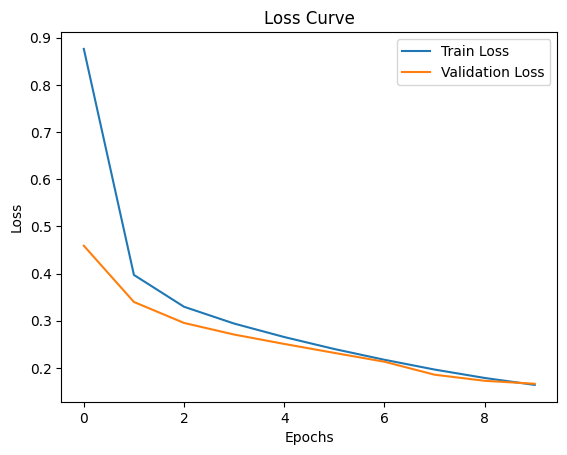

In [25]:
import matplotlib.pyplot as plt

# 繪製訓練與驗證的損失
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()

# # 繪製訓練與驗證的準確率
# plt.plot(model.history.history['accuracy'], label='Train Accuracy')
# plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()
